
## САМОСТОЯТЕЛЬНАЯ РАБОТА

## Исследование каналов привлечения

#### Задачи:
- Оценить количество ботов, которые заходят на наш сайт, и их долю от всего трафика.
- Определить, с каких источников и в какое время суток чаще всего заходят роботы.

Примечание:
            
* Роботами могут быть пауки поисковых систем, которые индексируют контент блога, или же различные парсеры и агрегаторы контента. «Яндекс.Метрика» позволяет находить этих роботов и показывает их в отдельном параметрe ym:s:isRobot, а также считает их долю в специальной метрике ym:s:robotPercentage
* Период исследования - сентябрь 2020

#### Требования:

- Ответ должен быть в виде ipynb-файла.

- Ipynb-файл должен запускаться и выполняться без необходимости изменять порядок действий. То есть при нажатии кнопки Restart Kernel & Re-run the whole notebook ноутбук должен выполниться без ошибок и выдать в конце результат проверки второй гипотезы.
- Результатом выполнения задания является написанный алгоритм, который производит вычисления и выводит данные, на основе которых можно подтвердить или опровергнуть гипотезу.

- Обязательно наличие выводов в формате ячеек с Markdown.

- Большим плюсом (но это не обязательное условие) будет, если в ходе алгоритма даны комментарии к коду (в виде комментариев Python или в разметке Markdown в Jupyter Notebook) с описанием назначения создаваемых переменных и выражений.

#### Критерии проверки:
- Запрос к метрике: сделан корректный запрос к метрике: все нужные dimensions (2 группировки) и metrics (2 метрики).
- Преобразование типов: произведено преобразование типов.
- Пропуски: обработаны, если они есть.
- Сводная таблица: для каждого вопроса сделан вывод сводной таблицы, где подсчитана доля роботов.
- Вывод: вывод с Markdown. Даны ли комментарии по подтверждению или опровержению гипотезы?
- Запуск файла: весь ноутбук запускается последовательно без ошибок.
- Комментарии к коду (факультативно): даны ли комментарии к коду (в виде комментариев Python либо в разметке Markdown в Jupyter Notebook) с описанием назначения создаваемых переменных и выражений?

### ЗАДАЧА №1
Оценить количество ботов, которые заходят на наш сайт, и их долю от всего трафика.

In [1]:
# Импортируем необходимые библиотеки
import json
import requests
import pandas as pd
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Записываем в переменные token - авторизационный ключ (токен), url - url, по которому будем делать запрос
# Создаем словарь headers, в котором мы передаем токен в заголовок запроса
token = 'AQAAAABYsUsPAAdl4Uk-JgmrRkKVnoeMD6SR7A0' 
headers = {'Authorization': 'OAuth ' + token}
url='https://api-metrika.yandex.net/stat/v1/data'

In [3]:
# Создаем словарь с параметрами запроса
params={'metrics':'ym:s:visits,ym:s:robotPercentage', #метрики: суммарное к-во визитов, доля посетителей предположительно являющ. роботами
        'dimensions':'ym:s:lastsignTrafficSource,ym:s:hour', #группировки: источник трафика(послед.значимый), час визита
        'date1':'2020-09-01',          
        'date2':'2020-09-30',
        'ids':30177909,
        'accuracy':'full', #возвращаем все данные 
        'limit':200
       }


In [4]:
# Получаем данные с помощью get-запроса
response=requests.get(url, params=params, headers=headers)
response

<Response [200]>

In [5]:
# Переводим данные в JSON формат
res=response.json()
pprint(res)

{'contains_sensitive_data': False,
 'data': [{'dimensions': [{'icon_id': '2',
                           'icon_type': 'traffic-source',
                           'id': 'organic',
                           'name': 'Search engine traffic'},
                          {'id': '16', 'name': '16:00'}],
           'metrics': [251.0, 24.70119522]},
          {'dimensions': [{'icon_id': '2',
                           'icon_type': 'traffic-source',
                           'id': 'organic',
                           'name': 'Search engine traffic'},
                          {'id': '15', 'name': '15:00'}],
           'metrics': [240.0, 26.25]},
          {'dimensions': [{'icon_id': '2',
                           'icon_type': 'traffic-source',
                           'id': 'organic',
                           'name': 'Search engine traffic'},
                          {'id': '11', 'name': '11:00'}],
           'metrics': [228.0, 25.87719298]},
          {'dimensions': [{'icon_id': '2',
 

In [6]:
# Посмотрим какого типа данные хранятся в объекте res
print(type(res))

<class 'dict'>


In [7]:
# Посмотрим ключи словаря
print(res.keys())

dict_keys(['query', 'data', 'total_rows', 'total_rows_rounded', 'sampled', 'contains_sensitive_data', 'sample_share', 'sample_size', 'sample_space', 'data_lag', 'totals', 'min', 'max'])


In [8]:
# Изучим сколько всего строк в нашем запросе
print(res['total_rows'])

107


In [9]:
#Избавимся от вложенных словарей и оставим только нужные нам данные
def ListOfDicts(res):    
    list_of_dicts=[]      
    metrics_list=res['query']['metrics'] 
    dimensions_list=res['query']['dimensions']
    for data_item in res['data']:  
        d = {}  
        
        for i,dimension in enumerate(data_item['dimensions']): 
            d[dimensions_list[i]] = dimension['name'] 
        for i,metric in enumerate(data_item['metrics']):
            d[metrics_list[i]] = metric 
        list_of_dicts.append(d) 
    return list_of_dicts

In [10]:
# Преобразуем данные с помощью функции ListOfDicts и запишем в переменную metrica_list_of_dicts
metrica_list_of_dicts=ListOfDicts(res)
len(metrica_list_of_dicts) ##[0:4]

107

In [11]:
# Создадим датафрейм
metrica_df=pd.DataFrame(metrica_list_of_dicts)
metrica_df.head()

,ym:s:lastsignTrafficSource,ym:s:hour,ym:s:visits,ym:s:robotPercentage
0,Search engine traffic,16:00,251.0,24.701195
1,Search engine traffic,15:00,240.0,26.250000
2,Search engine traffic,11:00,228.0,25.877193
3,Search engine traffic,13:00,227.0,28.193833
4,Search engine traffic,12:00,225.0,24.888889


In [12]:
# Переименуем столбцы
metrica_df.columns=['Source', 'Hour', 'Visits', 'RobotPercentage']
metrica_df

,Source,Hour,Visits,RobotPercentage
0,Search engine traffic,16:00,251.0,24.701195
1,Search engine traffic,15:00,240.0,26.250000
2,Search engine traffic,11:00,228.0,25.877193
3,Search engine traffic,13:00,227.0,28.193833
4,Search engine traffic,12:00,225.0,24.888889
...,...,...,...,...
102,Social network traffic,02:00,1.0,0.000000
103,Social network traffic,04:00,1.0,0.000000
104,Social network traffic,10:00,1.0,0.000000
105,Recommendation system traffic,08:00,1.0,0.000000


In [13]:
# Исследуем данные
metrica_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Source           107 non-null    object 
 1   Hour             107 non-null    object 
 2   Visits           107 non-null    float64
 3   RobotPercentage  107 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.5+ KB


In [14]:
# Посчитаем общую сумму визитов роботов и людей
all_visits=sum(metrica_df['Visits'])
all_visits

4315.0

In [15]:
# Добавим в датафрейм столбец с данными о кол-ве визитов, совершенных роботами и людьми и долю людей
metrica_df['Robot_visits']=metrica_df['Visits']/100*metrica_df['RobotPercentage']
metrica_df['People_visits']=metrica_df['Visits']-metrica_df['Robot_visits']
metrica_df['PeoplePercentage']=100-metrica_df['RobotPercentage']
metrica_df.head()

,Source,Hour,Visits,RobotPercentage,Robot_visits,People_visits,PeoplePercentage
0,Search engine traffic,16:00,251.0,24.701195,62.0,189.0,75.298805
1,Search engine traffic,15:00,240.0,26.250000,63.0,177.0,73.750000
2,Search engine traffic,11:00,228.0,25.877193,59.0,169.0,74.122807
3,Search engine traffic,13:00,227.0,28.193833,64.0,163.0,71.806167
4,Search engine traffic,12:00,225.0,24.888889,56.0,169.0,75.111111


In [16]:
# Проверим вычисления
all_visits==sum(metrica_df['Robot_visits'])+sum(metrica_df['People_visits'])


True

In [17]:
# Посчитаем кол-во ботов, которые заходят на сайт
all_robot_visits=round(sum(metrica_df['Robot_visits']))

# Посчитаем долю ботов от всего трафика
all_RobotPercentage=round(all_robot_visits*100/all_visits, 2)

print('Количество ботов, которые заходили на сайт в сентябре 2020 года составляет - {}'.format(all_robot_visits))
print('Доля ботов от всего трафика составляет {} %'.format(all_RobotPercentage))

Количество ботов, которые заходили на сайт в сентябре 2020 года составляет - 962
Доля ботов от всего трафика составляет 22.29 %


In [18]:
# Посчитаем кол-во людей, которые заходят на сайт
all_people_visits=round(sum(metrica_df['People_visits']))

# Посчитаем долю людей от всего трафика
all_PeoplePercentage=round(100-all_RobotPercentage, 2)

print('Количество людей, которые заходили на сайт в сентябре 2020 года составляет - {}'.format(all_people_visits))
print('Доля людей от всего трафика составляет {} %'.format(all_PeoplePercentage))

Количество людей, которые заходили на сайт в сентябре 2020 года составляет - 3353
Доля людей от всего трафика составляет 77.71 %


In [19]:
# 2 СПОСОБ (т.к. в критериях прописано создание сводной таблицы, хотя все вычисления для решения 1 задачи можно сделать
# без нее, cоздадим сводную таблицу.Вычисления для решения 1 задачи делаются аналогично, как и без применения сводной
# (дублировать нет смысла).

pivot_table=metrica_df.pivot_table( index=['Source'], values=['Visits','Robot_visits', 'People_visits'], \
                                     aggfunc='sum', fill_value=0)
pivot_table

,People_visits,Robot_visits,Visits
Source,,,
Cached page traffic,5,1,6
Direct traffic,580,177,757
Internal traffic,7,3,10
Link traffic,95,31,126
Recommendation system traffic,2,0,2
Search engine traffic,2595,739,3334
Social network traffic,69,11,80


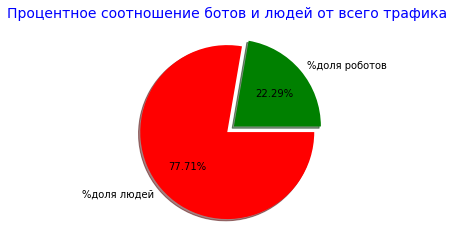

In [20]:
vals=['962', '3353']
labels=['%доля роботов',\
        '%доля людей']
explode=(0.1, 0)
fig, axes=plt.subplots()
axes.pie(vals, labels=labels, autopct='%1.2f%%', explode=explode, shadow=True, colors='green')
axes.set_title('Процентное соотношение ботов и людей от всего трафика', fontsize=14, color='b')
plt.show()

### ВЫВОД к задаче №1

Почти четверть всего трафика в сентябре 2020 года приходилось на ботов:
- количество ботов, которые заходили на сайт - 962
- доля ботов от всего трафика - 22.29 %


### ЗАДАЧА №2

Определить, с каких источников и в какое время суток чаще всего заходят роботы.

In [21]:
# Исключим из обработки источники, через которые совершалось очень мало визитов на сайт (<30)
pivot_table_new=pivot_table[pivot_table['Visits']>=30]
pivot_table_new

,People_visits,Robot_visits,Visits
Source,,,
Direct traffic,580,177,757
Link traffic,95,31,126
Search engine traffic,2595,739,3334
Social network traffic,69,11,80


In [22]:
# Создадим сводную таблицу
pivot_table_2=metrica_df.pivot_table(index=['Source','Hour'], values=['Robot_visits'], aggfunc='sum', fill_value=0).reset_index()
pivot_table_2

,Source,Hour,Robot_visits
0,Cached page traffic,01:00,1
1,Cached page traffic,08:00,0
2,Cached page traffic,11:00,0
3,Cached page traffic,12:00,0
4,Cached page traffic,17:00,0
...,...,...,...
102,Social network traffic,19:00,0
103,Social network traffic,20:00,0
104,Social network traffic,21:00,1
105,Social network traffic,22:00,3


In [23]:
# Создадим сводную таблицу, 
# в которой объединим сводную таблицу с данными об общем кол-ве визитов роботов с разных источников (с иключенными источ.) 
# и сводную таблицу, где данные по визитам разделены по времени 
pivot_table_3=pivot_table_2.merge(pivot_table_new['Robot_visits'], on='Source')
pivot_table_3

,Source,Hour,Robot_visits_x,Robot_visits_y
0,Direct traffic,00:00,2,177
1,Direct traffic,01:00,4,177
2,Direct traffic,02:00,2,177
3,Direct traffic,03:00,2,177
4,Direct traffic,04:00,3,177
...,...,...,...,...
87,Social network traffic,19:00,0,11
88,Social network traffic,20:00,0,11
89,Social network traffic,21:00,1,11
90,Social network traffic,22:00,3,11


In [24]:
# Переименуем столбцы.
# добавим столбец с долей визитов роботов через определенный источник в определенный промежуток времени 
# от общего кол-ва визитов роботов, которые заходили на сайт через данный источник. 
pivot_table_3.columns=('Source','Hour','Robot_visits', 'Total_visits_from_source')
pivot_table_3['Percent_robot_visits']=round(pivot_table_3['Robot_visits']*100/pivot_table_3['Total_visits_from_source'],2)
pivot_table_3

,Source,Hour,Robot_visits,Total_visits_from_source,Percent_robot_visits
0,Direct traffic,00:00,2,177,1.13
1,Direct traffic,01:00,4,177,2.26
2,Direct traffic,02:00,2,177,1.13
3,Direct traffic,03:00,2,177,1.13
4,Direct traffic,04:00,3,177,1.69
...,...,...,...,...,...
87,Social network traffic,19:00,0,11,0.00
88,Social network traffic,20:00,0,11,0.00
89,Social network traffic,21:00,1,11,9.09
90,Social network traffic,22:00,3,11,27.27


In [25]:
#Уберем столбец 'Total_visits_from_sours'
pivot_table_3=pivot_table_3[['Source','Hour','Robot_visits', 'Percent_robot_visits']]
pivot_table_3

,Source,Hour,Robot_visits,Percent_robot_visits
0,Direct traffic,00:00,2,1.13
1,Direct traffic,01:00,4,2.26
2,Direct traffic,02:00,2,1.13
3,Direct traffic,03:00,2,1.13
4,Direct traffic,04:00,3,1.69
...,...,...,...,...
87,Social network traffic,19:00,0,0.00
88,Social network traffic,20:00,0,0.00
89,Social network traffic,21:00,1,9.09
90,Social network traffic,22:00,3,27.27


In [26]:
#Отсортируем данные по количеству визитов (по убыванию)
pivot_table_3=pivot_table_3.sort_values('Robot_visits', ascending=False).reset_index(drop=True)
pivot_table_3

,Source,Hour,Robot_visits,Percent_robot_visits
0,Search engine traffic,13:00,64,8.66
1,Search engine traffic,15:00,63,8.53
2,Search engine traffic,16:00,62,8.39
3,Search engine traffic,11:00,59,7.98
4,Search engine traffic,14:00,58,7.85
...,...,...,...,...
87,Link traffic,01:00,0,0.00
88,Link traffic,02:00,0,0.00
89,Link traffic,19:00,0,0.00
90,Link traffic,21:00,0,0.00


In [27]:
# Отсортируем данные по доле визитов (по убыванию)
pivot_table_4=pivot_table_3.sort_values('Percent_robot_visits', ascending=False).reset_index(drop=True)
pivot_table_4

,Source,Hour,Robot_visits,Percent_robot_visits
0,Social network traffic,22:00,3,27.27
1,Link traffic,10:00,6,19.35
2,Social network traffic,13:00,2,18.18
3,Link traffic,11:00,3,9.68
4,Link traffic,16:00,3,9.68
...,...,...,...,...
87,Social network traffic,18:00,0,0.00
88,Social network traffic,19:00,0,0.00
89,Social network traffic,20:00,0,0.00
90,Social network traffic,11:00,0,0.00


In [28]:
# Посмотрим в какое время чаще всего заходят боты источника Search_engine
Search_engine=(pivot_table_3[pivot_table_3['Source']=='Search engine traffic'].reset_index(drop=True))[0:3]
Search_engine

,Source,Hour,Robot_visits,Percent_robot_visits
0,Search engine traffic,13:00,64,8.66
1,Search engine traffic,15:00,63,8.53
2,Search engine traffic,16:00,62,8.39


In [29]:
# Посмотрим в какое время чаще всего заходят боты источника Direct
Direct=pivot_table_3[pivot_table_3['Source']=='Direct traffic'].reset_index(drop=True)[0:3]
Direct

,Source,Hour,Robot_visits,Percent_robot_visits
0,Direct traffic,12:00,15,8.47
1,Direct traffic,14:00,14,7.91
2,Direct traffic,21:00,13,7.34


In [30]:
# Посмотрим в какое время чаще всего заходят боты источника Link
Link=pivot_table_3[pivot_table_3['Source']=='Link traffic'].reset_index(drop=True)[0:3]
Link

,Source,Hour,Robot_visits,Percent_robot_visits
0,Link traffic,10:00,6,19.35
1,Link traffic,16:00,3,9.68
2,Link traffic,11:00,3,9.68


In [31]:
# Посмотрим в какое время чаще всего заходят боты источника Social_network
Social_network=pivot_table_3[pivot_table_3['Source']=='Social network traffic'].reset_index(drop=True)[0:3]
Social_network

,Source,Hour,Robot_visits,Percent_robot_visits
0,Social network traffic,22:00,3,27.27
1,Social network traffic,13:00,2,18.18
2,Social network traffic,09:00,1,9.09


### ВЫВОД к задаче №2
##### 1. Если оценивать в абсолютных величинах, то больше всего визитов ботов из источника 
##### Search engine traffic:
- в 13:00 -64 визита (8.66% от всех визитов роботов из данного источника)
- в 15:00 - 63 визита (8.53% от всех визитов роботов из данного источника)
- в 16:00 - 62 визита (8.39% от всех визитов роботов из данного источника)

##### 2. Если оценивать в процентном соотношении, то наибольшая доля визитов ботов из источника 
##### Social network traffic:
- в 22:00 - 27.27% от всех визитов роботов из данного источника. Однако, нужно учитывать, что из этого источника в сентябре было всего 11 визитов ботов и 27% - это всего 3 визита.

##### 3. Наибольшее количество визитов ботов из разных источников приходится на разное время:
- Search_engine traffic - 13:00 (64 визита - 8.66% от всех визитов роботов из данного источника)
- Direct traffic - 12:00 (15 визитов - 8.47% от всех визитов роботов из данного источника)
- Link traffic - 10:00 (6 визитов - 19.35% от всех визитов роботов из данного источника)
- Social network traffic - 22:00 (3 визита - 27.27% от всех визитов роботов из данного источника)